# Dataset arbres
Source : http://data.metropolegrenoble.fr/ckan/dataset/les-arbres-de-grenoble
## Exploration préliminaire des données

Idées de sujet : 
- Quel a été le maire le plus vert sur la période concernée ? 
- Quelles sont les 5 espèces d'arbres les plus représentées à Grenoble ? 
- Combien y a-t-il d'arbres "solitaires", i.e. uniques représentants de leur espèce ? 

In [43]:
import csv
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random

In [44]:
# Import du style
!jt -t monokai -fs 95 -altp -tfs 11 -nfs 115 -cellw 88% -T
plt.style.use('bmh')

In [45]:
# Chargement des données dans un dataframe pandas
df = pd.read_csv('data/arbres.csv')

-------------------------------------------------
### Nombre d'entrées non nulles dans chaque colonne

Remarques : 
- pas d'info sur l'année d'abattage (sont ils tous encore en vie ?) 
- Pas d'info sur le diamètre des arbres

--------------------------------------------------

In [46]:
df.count()

ELEM_POINT_ID            31243
CODE                     31243
NOM                      31243
GENRE                    31243
GENRE_DESC               31243
CATEGORIE                31243
CATEGORIE_DESC           31243
SOUS_CATEGORIE           31243
SOUS_CATEGORIE_DESC      31243
CODE_PARENT              31243
CODE_PARENT_DESC         31243
ADR_SECTEUR              31243
BIEN_REFERENCE           31243
GENRE_BOTA               30728
ESPECE                   29053
VARIETE                   4039
STADEDEDEVELOPPEMENT     29228
EQUIPE                       0
REMARQUES                    0
ANNEEDEPLANTATION        30801
RAISONDEPLANTATION        1050
TRAITEMENTCHENILLES       2338
COURRIER                     0
IDENTIFIANTPLU             610
TYPEIMPLANTATIONPLU        610
INTITULEPROTECTIONPLU      610
ANNEEABATTAGE                0
ESSOUCHEMENT                 0
DIAMETREARBRE                0
CAUSEABATTAGE                0
COLLECTIVITE             30804
GeoJSON                  31243
dtype: i

--------------------------------------------------
On enlève les colonnes sans aucune entrée => pas de valeur 

---------------------------------------------------

In [47]:
bools = (df.count() > 0)
df = df.loc[:, bools.values]

On regarde un peu à quoi ressemblent les données ! 

In [285]:
df.head()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,TRAITEMENTCHENILLES,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,COLLECTIVITE,GeoJSON
0,37993,ESP37969,ESP37969,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7603469008942..."
1,37992,ESP37968,ESP37968,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7598264646441..."
2,37991,ESP37967,ESP37967,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7599807314486..."
3,37990,ESP37966,ESP37966,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600570301267..."
4,37989,ESP37965,ESP37965,VEG,VEGETATION,ESP01,Arbre,ESP065,Arbre d'enceintes fermées,ESP37898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600202792924..."


------------------------------------------
### Combien d'éléments uniques dans chaque colonne ? 
Remarques : 
- nbre d'ID = nbre d'arbres
- 255 espèces d'arbres répertoriées
- Quelle est la hiérarchie dans GENRE_BOTA, ESPECE et VARIETE ? 

--------------------------------------------

In [49]:
df.nunique()

ELEM_POINT_ID            31243
CODE                     31243
NOM                      31243
GENRE                        1
GENRE_DESC                   1
CATEGORIE                    1
CATEGORIE_DESC               1
SOUS_CATEGORIE               4
SOUS_CATEGORIE_DESC          4
CODE_PARENT               1447
CODE_PARENT_DESC          1447
ADR_SECTEUR                  6
BIEN_REFERENCE           31243
GENRE_BOTA                 112
ESPECE                     255
VARIETE                    146
STADEDEDEVELOPPEMENT         3
ANNEEDEPLANTATION           58
RAISONDEPLANTATION           3
TRAITEMENTCHENILLES          3
IDENTIFIANTPLU              46
TYPEIMPLANTATIONPLU          4
INTITULEPROTECTIONPLU        3
COLLECTIVITE                 2
GeoJSON                  31242
dtype: int64

***
#### Quels sont les éléments uniques dans chaque colonne ? 
***


In [50]:
# j'applique la fonction set sur chacune des colonnes du dataframe
# (set permet de récupérer les éléments uniques et de les ranger dans un "set")
sets = df.apply(set)

# J'enlève les nan
for col in df.columns.values: 
    sets[col] = {x for x in sets[col] if pd.notna(x)}

In [51]:
sets

ELEM_POINT_ID            {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
CODE                     {ESP32027, ESP26503, ESP2031, ESP5458, ESP7666...
NOM                      {ESP32027, ESP26503, ESP2031, ESP5458, ESP7666...
GENRE                                                                {VEG}
GENRE_DESC                                                    {VEGETATION}
CATEGORIE                                                          {ESP01}
CATEGORIE_DESC                                                     {Arbre}
SOUS_CATEGORIE                            {ESP151, ESP065, ESP174, ESP187}
SOUS_CATEGORIE_DESC      {Arbre d'enceintes fermées, Bois semi naturel,...
CODE_PARENT              {ESP655, ESP721, ESP98, ESP1229, ESP495, ESP30...
CODE_PARENT_DESC         {R des Arts pas Colbert, Bd J Pain Forum sép c...
ADR_SECTEUR                                             {1, 2, 3, 4, 5, 6}
BIEN_REFERENCE           {AR26928, AR29475, AR12527, AR10846, AR20365, ...
GENRE_BOTA               

In [235]:
# 10 éléments random dans "GENRE_BOTA" (pour voir à quoi ça ressemble)
random.sample(sets['GENRE_BOTA'], 10)

['Davidia',
 'Eriobotrya ',
 'Corylus',
 'Ficus',
 'Sophora',
 'Salix',
 'Koelreuteria',
 'Pteroceltis',
 'Cedrela',
 'Nyssa']

In [236]:
# 10 éléments random dans "ESPECE" (idem)
random.sample(sets['ESPECE'], 10)

['aquifolium',
 'monticola',
 'castaneifolia',
 'granatum',
 'coggygria',
 'floribunda',
 'pavia',
 'davidii',
 'cerasifera',
 'hippocastanum']

***
## Visualisation des données

Combien d'arbres plantés année par année ? \
Le maire le + vert => Hubert Dubedout (1975)
***

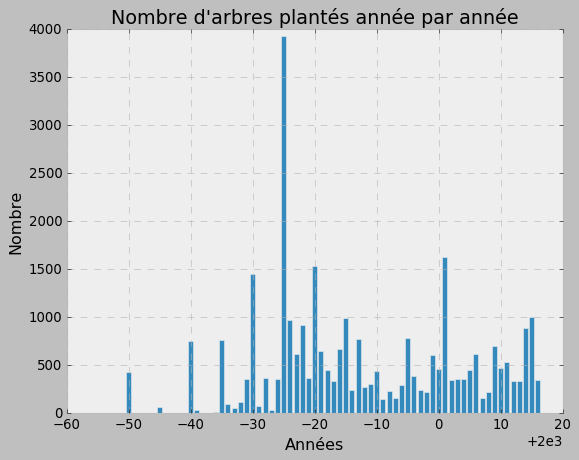

In [54]:
years = range(int(min(sets['ANNEEDEPLANTATION'])), int(max(sets['ANNEEDEPLANTATION'])))
nbre_arbres_year = []
for year in years: 
    nbre_arbres_year.append(df[df.ANNEEDEPLANTATION == year].shape[0])

plt.bar(years, nbre_arbres_year)
plt.ylabel("Nombre")
plt.xlabel("Années")
plt.title("Nombre d'arbres plantés année par année"); 
plt.show()

***
## Statistiques sur la répartition des arbres 
Arbres les plus/ moins représentés à Grenoble ?
***

In [241]:
data = []
for genre in sets['GENRE_BOTA']: 
    data.append({'Genre_bota': genre, 'Nombre': df[df.GENRE_BOTA == genre].shape[0]}) 
    
df_repartition = pd.DataFrame(data) 

In [242]:
# Les arbres les plus représentés
df_repartition.nlargest(10, 'Nombre')

,Genre_bota,Nombre
44,Acer,5276
1,Platanus,4663
5,Pinus,2118
76,Tilia,1770
23,Fraxinus,1506
33,Carpinus,1296
22,Betula,1247
84,Prunus,996
89,Populus,966
12,Alnus,826


In [238]:
# Les arbres uniques à Grenoble
df_repartition[df_repartition['Nombre'] == 1]

,Genre_bota,Nombre
7,Sterculia,1
9,Sequoia,1
15,Rhamnus,1
20,Poncinos,1
40,Staphylea,1
57,Castanea,1
80,Nyssa,1
93,Sciadopitys,1
108,Sorbopyrus,1
111,Eucalyptus,1


#### Description générale => pas beaucoup d'intérêt dans ce cas

In [239]:
df_repartition['Nombre'].describe()

count     112.000000
mean      274.357143
std       737.510285
min         1.000000
25%         5.000000
50%        33.000000
75%       204.750000
max      5276.000000
Name: Nombre, dtype: float64

#### Plot des 50 espèces les plus représentées à Grenoble

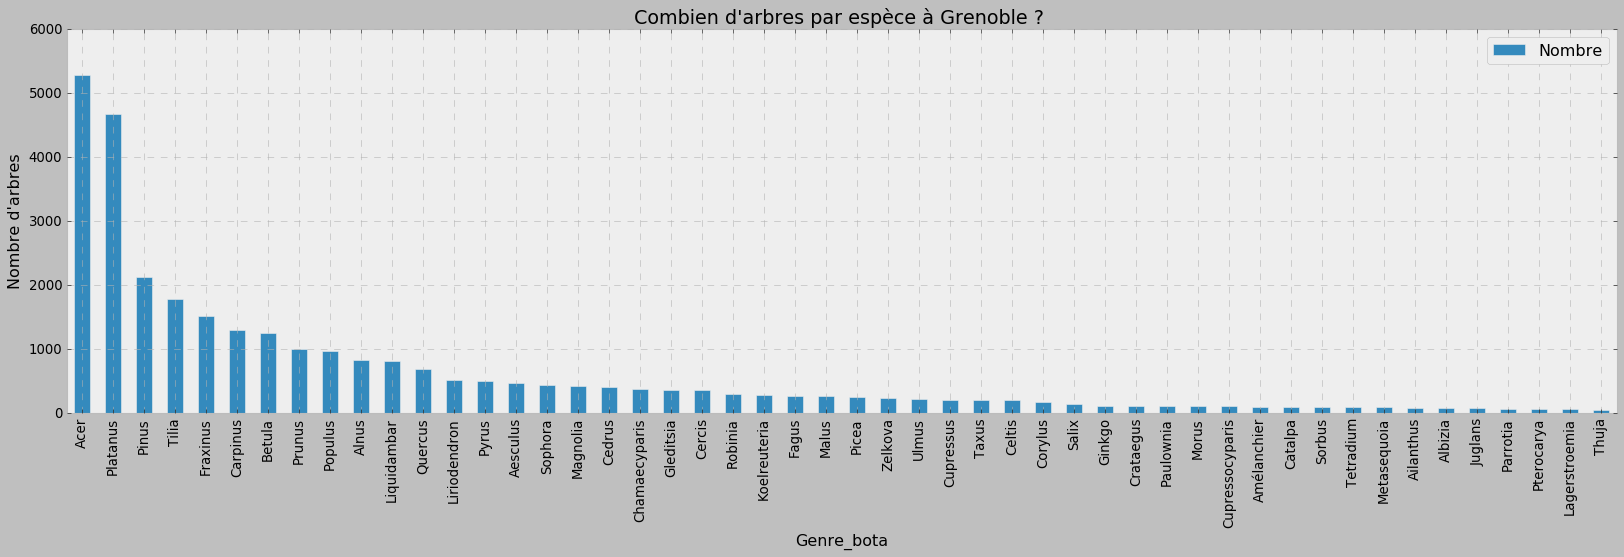

In [244]:
plt.figure(figsize=(25,6))
df_repartition.nlargest(50, 'Nombre').plot(kind='bar',x='Genre_bota',y='Nombre', ax = plt.gca())
plt.ylabel("Nombre d'arbres")
plt.title("Combien d'arbres par espèce à Grenoble ? ")
plt.show()

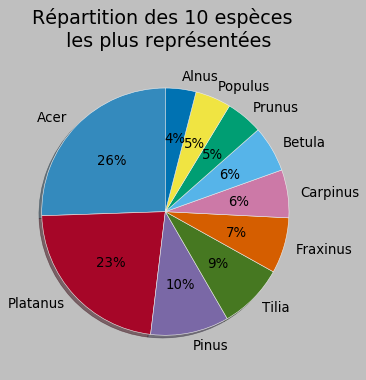

In [249]:
# Répartition des 10 espèces les plus représentées dans un Pie Chart
nbre = 10
labels = df_repartition.nlargest(nbre, 'Nombre')["Genre_bota"]
sizes = df_repartition.nlargest(nbre, 'Nombre')["Nombre"]

plt.figure(figsize=(4,5))
ax1 = plt.gca()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f"Répartition des {nbre} espèces \n les plus représentées")
plt.show()

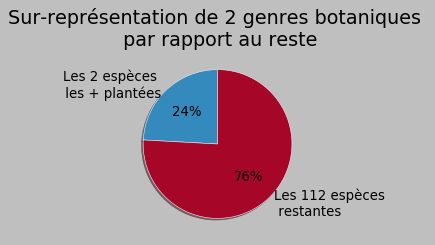

In [260]:
nbre = 2

plus_representes = df_repartition.nlargest(nbre, 'Nombre')["Nombre"].sum()
moins_representes = df.shape[0]
sizes = [plus_representes, moins_representes]
labels = [f"Les {nbre} espèces \n les + plantées", f"Les {df_repartition.shape[0]} espèces \n restantes"]

plt.figure(figsize=(3,6))
ax1 = plt.gca()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
plt.title(f"Sur-représentation de {nbre} genres botaniques \n par rapport au reste")
plt.show()

***
### Exploration de la hiérarchie : genre botanique > espèce > variété 
genre botanique <br>
&emsp; &emsp; |_ espèce <br>
&emsp; &emsp; &emsp; &emsp; |_ variété <br>
***

In [228]:
# sets_genre est une série dont les index sont les genre botaniques, 
# la valeur associée à chaque genre botanique est un set des espèces représentées
sets_genre = pd.Series(index=list(sets['GENRE_BOTA']), 
                       data=[set() for _ in range(112)])

for genre in sets_genre.index:
    list_espece = df[df.GENRE_BOTA == genre]['ESPECE'].values
    for espece in list_espece:
        if pd.notna(espece):
            sets_genre[genre].add(espece)     
        
print(sets_genre)

Trachycarpus                                           {fortunei}
Platanus                       {orientalis, platanor, acerifolia}
Eriobotrya                                             {japonica}
Liriodendron                                         {tulipifera}
Chitalpa                                          {tashkentensis}
                                      ...                        
Mespilus                                              {germanica}
Sorbopyrus                                          {auricularis}
Olea                                                   {europaea}
Magnolia        {liliflora, grandiflora, soulangeana, hybride,...
Eucalyptus                                                {gunii}
Length: 112, dtype: object


#### Combien d'espèces par genre botanique ?

In [202]:
counter = 0; 
for genre in sets_genre.index:
    counter += len(sets_genre[genre])
    print(f"{genre} : {len(sets_genre[genre])}")

Trachycarpus : 1
Platanus : 4
Eriobotrya  : 1
Liriodendron : 2
Chitalpa : 1
Pinus : 7
Chionanthus : 2
Sterculia : 1
Chimonanthus : 1
Sequoia : 1
Thuja : 3
Koelreuteria : 1
Alnus : 5
Abies : 4
Gleditsia : 2
Rhamnus : 1
Rhus : 2
Amélanchier : 5
Corylus : 3
Buxus : 1
Poncinos : 1
Sequoiadendron : 2
Betula : 7
Fraxinus : 12
Halesia : 2
Liquidambar : 3
Sophora : 2
Pterostyrax : 1
Salix : 10
Cotinus : 1
Laburnum : 2
Punica : 1
Taxodium : 1
Carpinus : 2
Cydonia : 2
Catalpa : 1
Picea : 6
Robinia : 4
Phellodendron : 1
Lonicera : 2
Staphylea : 1
Ilex : 1
Styrax : 1
Calocedrus : 1
Acer : 27
Syringa : 3
Crataegus : 7
Fagus : 1
Morus : 4
Phillyrea : 1
Ficus : 2
Malus : 11
Pterocarya : 2
Quercus : 21
Cedrela : 1
Araucaria : 1
Cedrus : 5
Castanea : 1
Photinia : 1
Maclura : 1
Sorbus : 8
Libocedrus : 1
Davidia : 1
Tetradium : 1
Fontanesia : 1
Sambucus : 1
Juniperus : 3
Cladastris : 1
Cercis : 4
Larix : 1
Pteroceltis : 1
Hovenia : 1
Cornus : 3
Ptelea : 1
Metasequoia : 1
Clerodendron : 1
Tilia : 9
Ligust

***
## Problème ?
Nombre d'espèces catégorisées > Nombre d'espèces total que l'on avait identifié dans le dataframe initial. Une espèce appartient à plusieurs genre botaniques ? <br>
==> Prochaine étape : voir quels sont les doublons
***

In [201]:
print(f"Nombre total d'espèce catégorisées : {counter}")

Nombre total d'espèce catégorisées : 345


***
## Résolution 
#### Recherche d'intersection des sets. Résultat avec l'exemple du genre "Platanus".
Il existe le "Platanus orientalis"  mais aussi le "Liquidambar orientalis", le "Carpinus orientalis" et le "Picea orientalis"  ! ==> Finalement pas de contradiction
***

In [232]:
for genre in sets_genre.index:
    mySet = sets_genre["Platanus"].intersection(sets_genre[genre])
    if(len(mySet)>0):
        print(f"Espece(s) commune(s) avec le genre {genre}: {mySet}")

Espece(s) commune(s) avec le genre Platanus: {'orientalis', 'platanor', 'acerifolia'}
Espece(s) commune(s) avec le genre Liquidambar: {'orientalis'}
Espece(s) commune(s) avec le genre Carpinus: {'orientalis'}
Espece(s) commune(s) avec le genre Picea: {'orientalis'}


***
### Analyse de l'âge des arbres
***

In [283]:
from collections import Counter
age_counter = Counter()

for ind in df.index:
    stade = df['STADEDEDEVELOPPEMENT'][ind]
    age_counter[stade] += 1

print(age_counter)

Counter({'Arbre adulte': 23875, 'Arbre jeune': 5170, nan: 2015, 'Arbre vieillissant': 183})


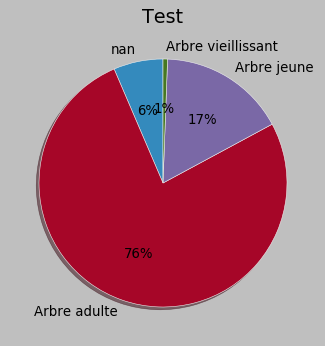

In [307]:
plt.figure(figsize=(5,6))
ax1 = plt.gca()
ax1.pie(list(age_counter.values()), labels=list(age_counter), autopct='%1.0f%%', shadow=True, startangle=90)
plt.title(f"Test")
plt.show()

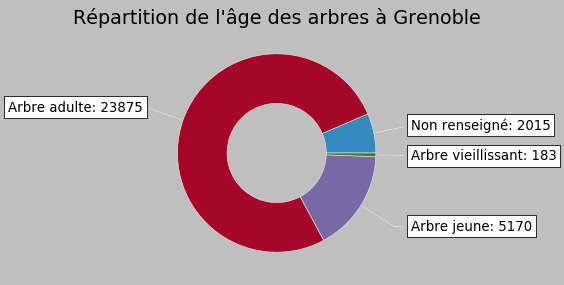

In [335]:
labels = []
for elt in age_counter:
    label = f"{elt}: {age_counter[elt]}".replace("nan", "Non renseigné")
    labels.append(label)

data = list(age_counter.values())

fig, ax = plt.subplots(figsize=(4, 5), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=0)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Répartition de l'âge des arbres à Grenoble")
plt.show()